<a href="https://colab.research.google.com/github/lillianpoland/hi-class/blob/main/Copy_of_Unit7ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
!pip install preliz
!pip install bambi

In [40]:
import preliz as pz
import pymc as pm
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import bambi as bmb

# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

Polynomials work better for data with complicated and obscure relationships. This is super helpful because we are able to analyze data that is not super linear. The polynomial element will help fit the curves that come with the complexity from certain relationships. When we use polynomial elements more flexibility is allowed because, again, the model will adjust to changes in the trends. Compared to other methods like b splines and neural networks, polynomial elements are much more simplistic which makes them easier to understand and interpret.

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

In situations where we already understand what is going on. Polynomials have the downside of overfitting data if we increase the degree too much. A linear-degree one polynomial-model has a simpler interpretation and we should always use the simplest model possible. The reasons for this include: Simpler models are easier to interpret than complicated models, they also run faster on the computer, and simpler models help to avoid overfitting. As stated in the notes, if predictions stop improving, then stop increasing the complexity of your model. So, if your model isn't getting any better, adding complexity will not assist in interpreting the data correctly.

**Task3**:

What's the point of using b splines?

B splines allow us to gain the flexibility of polynomial regression without as much overfitting. B splines put more weight on the important data and less weight on the less important data (and they are very good at doing that task). B splines are a form of piecewise polynomial regression and can also create a well fitting curve for our data, but with a lower chance for overfitting compared to polynomial regression.

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

The Gaussian Process chooses the number of polynomial regressions or knots and the location of the knots. The textbook reccomends putting knots at the median, 25th and 75th percentile, though the location can be determined automatically through neural network.

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model


In [29]:
howell = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/howell.csv')

In [30]:
howell

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0
...,...,...,...,...
539,145.415,31.127751,17.0,1
540,162.560,52.163080,31.0,1
541,156.210,54.062497,21.0,0
542,71.120,8.051258,0.0,1


In [37]:
#degree 2 polynomial model
model_poly_2 = bmb.Model("weight ~ poly(height, degree=2)", howell, family="negativebinomial")
idata_poly_2 = model_poly_2.fit()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


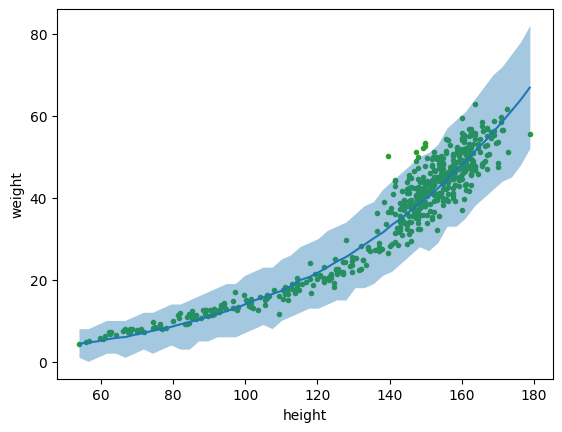

In [38]:
bmb.interpret.plot_predictions(model_poly_2, idata_poly_2, "height", pps=True)
plt.plot(howell.height, howell.weight, "C2.", zorder=-3)

<Axes: xlabel='weight'>

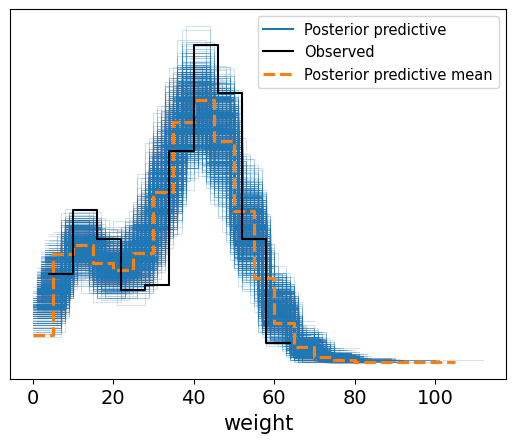

In [43]:
model_poly_2.predict(idata_poly_2, kind="response")
az.plot_ppc(idata_poly_2)

Using degree 2 worked and looks pretty good. I tried degree 3 and it looked pretty much the same, so using the lower degree is better for the model.

**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

I learned you can define custom mean and covariance functions. The mean function is like the expected value of the process, whereas the covariance function defines the relationship between different data points. If you customize these two functions you can alter the GP to specific components of the data like making it smoother. If a trend in your data is super complex, defining mean functions can allow you to see specific patterns in your data. As the covariance functions affect smoothness, if you combine kernels you are able to create a more flexible model which is great.

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

My favorite graph from the article was the the posterior predictive distribution. The line that represents the model's mean prediction is really smooth and has the shaded regions that show the uncertainty around the prediction, which I think looks pretty nice as well as being functional. The graph is very clear the way it visually conveys the predictions as well as the uncertainty.  